In [1]:
# all imports
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np 

# Get COSMOS Data

In [2]:
# open COSMOS master file and get data 
inf = fits.open('D:\IfA REU\Catalogs\COSMOS2020_CLASSIC_R1_v2.0_master.fits')
data = inf[1].data
cols = inf[1].columns
head = inf[0].header
inf.close()

# NOTE: Only run this once! It gets stuck if you try to run this again. If it gets stuck, interrupt and restart the jupyter kernel then run again. 

In [3]:
# IRAC Columns (unit = 'uJy')
ch1 = 'SPLASH_CH1_FLUX' # 3.5686 um
ch2 = 'SPLASH_CH2_FLUX' # 4.5067 um
ch3 = 'SPLASH_CH3_FLUX' # 5.7788 um
ch4 = 'SPLASH_CH4_FLUX' # 7.9958 um 

# get IRAC data
ch1_data = np.array(data[ch1])
ch2_data = np.array(data[ch2])
ch3_data = np.array(data[ch3])
ch4_data = np.array(data[ch4])

# info
print('CH1 : \t Min: ', min(ch1_data), '\t Max: ', max(ch1_data), '\t Total: ', len(ch1_data))
print('CH2 : \t Min: ', min(ch2_data), '\t Max: ', max(ch2_data), '\t Total: ', len(ch2_data))
print('CH3 : \t Min: ', min(ch3_data), '\t\t Max: ', max(ch3_data), '\t Total: ', len(ch3_data))
print('CH4 : \t Min: ', min(ch4_data), '\t\t Max: ', max(ch4_data), '\t Total: ', len(ch4_data))

CH1 : 	 Min:  -373.86588 	 Max:  11499.407 	 Total:  1720700
CH2 : 	 Min:  -200.00957 	 Max:  12870.739 	 Total:  1720700
CH3 : 	 Min:  -99.9 		 Max:  17447.684 	 Total:  1720700
CH4 : 	 Min:  -99.9 		 Max:  15091.21 	 Total:  1720700


In [4]:
# determine valid data
ch1_good = (ch1_data > 0) 
ch2_good = (ch2_data > 0) 
ch3_good = (ch3_data > 0) 
ch4_good = (ch4_data > 0)

# print lengths
print('Ch1 Length: ', len(ch1_good))
print('Ch2 Length: ', len(ch2_good))
print('Ch3 Length: ', len(ch3_good))
print('Ch4 Length: ', len(ch4_good))

# full list 
all_good = ch1_good & ch2_good & ch3_good & ch4_good
print('All Length: ', len(all_good))

# filter IRAC data
ch1_data_good = ch1_data[all_good]
ch2_data_good = ch2_data[all_good]
ch3_data_good = ch3_data[all_good]
ch4_data_good = ch4_data[all_good]

# info
print('CH1 : \t Min: ', min(ch1_data_good), '\t Max: ', max(ch1_data_good), '\t Total: ', len(ch1_data_good))
print('CH2 : \t Min: ', min(ch2_data_good), '\t Max: ', max(ch2_data_good), '\t Total: ', len(ch2_data_good))
print('CH3 : \t Min: ', min(ch3_data_good), '\t Max: ', max(ch3_data_good), '\t Total: ', len(ch3_data_good))
print('CH4 : \t Min: ', min(ch4_data_good), '\t Max: ', max(ch4_data_good), '\t Total: ', len(ch4_data_good))

Ch1 Length:  1720700
Ch2 Length:  1720700
Ch3 Length:  1720700
Ch4 Length:  1720700
All Length:  1720700
CH1 : 	 Min:  0.012139931 	 Max:  11499.407 	 Total:  100469
CH2 : 	 Min:  0.0009702638 	 Max:  12870.739 	 Total:  100469
CH3 : 	 Min:  0.00084613566 	 Max:  13670.983 	 Total:  100469
CH4 : 	 Min:  0.00084613566 	 Max:  15091.21 	 Total:  100469


# AGN Selection Criterea (Donley, 2012) 

x = log10 ( f5.8 μm / f3.6 μm ), 
y = log10 ( f8.0 μm / f4.5 μm ) 

x >= 0.08 AND 
y >= 0.15 AND
y >= (1.21 x) − 0.27 AND
y <= (1.21 x) + 0.27 AND
f4.5 μm > f3.6 μm AND
f5.8 μm > f4.5 μm AND
f8.0 μm > f5.8 μm

In [5]:
# Draw the selection wedge for Donley 2012 
def PlotDonleyWedge() : 
    # constants
    x_min = 0.08    # x >= 0.08
    y_min = 0.15    # y >= 0.15
    max = 10        # arbritrary 

    # calculate intercepts
    x_int_ymin = (y_min + 0.27)/1.21  # intercept between y_min and (y>=1.21x-0.27)
    y_int_xmin = (1.21*x_min) + 0.27  # intercept between x_min and (y>=1.21x+0.27)

    # calculate y_low intercepts (y>=1.21x-0.27)
    y1_low = (1.21*x_int_ymin)  - 0.27   
    y2_low = (1.21*max)         - 0.27

    # calculate y_high intercepts (y>=1.21x+0.27)
    y1_high = (1.21*x_min)      + 0.27
    y2_high = (1.21*max)        + 0.27

    # plot lines between intercepts 
    plt.plot( [x_min,       x_min],         [y_min,     y_int_xmin], 'r')    # x >= 0.08
    plt.plot( [x_min,       x_int_ymin],    [y_min,     y_min],      'r')    # y >= 0.15
    plt.plot( [x_int_ymin,  max],           [y1_low,    y2_low],     'r')    # y >= 1.21x - 0.27
    plt.plot( [x_min,       max],           [y1_high,   y2_high],    'r')    # y <= 1.21x + 0.27

    # name the x and y axis 
    plt.xlabel(r'$log(f_{5.8}/f_{3.6})$') 
    plt.ylabel(r'$log(f_{8.0}/f_{4.5})$') 

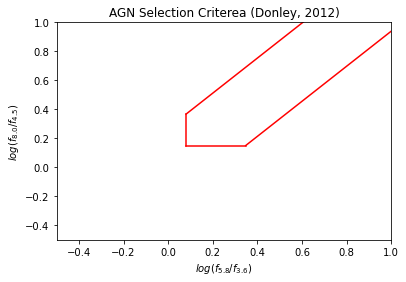

In [6]:
# plot 
PlotDonleyWedge()

# customize plot
plt.axis([-0.5,1,-0.5,1]) 
plt.title('AGN Selection Criterea (Donley, 2012)') 
    
# show the plot 
plt.show()

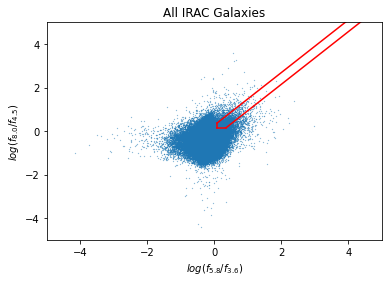

Galaxy count:  100469


In [7]:
# calculate colors for each galaxy
x = np.log10( ch3_data / ch1_data ) # x = log10 ( f_5.6um / f_3.6um )
y = np.log10( ch4_data / ch2_data ) # y = log10 ( f_8.0um / f_4.5 um )

# plot 
plt.plot(x, y, 'o', markersize=0.2)
PlotDonleyWedge()
plt.axis([-5,5,-5,5]) 
plt.title('All IRAC Galaxies') 
plt.show()

# print number of galaxies
print('Galaxy count: ', len(x))

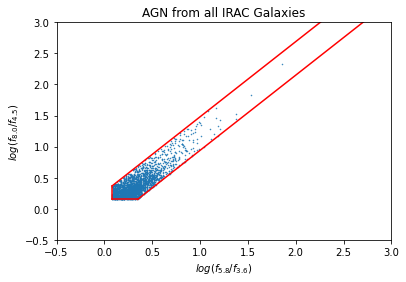

Galaxy count:  2287


In [8]:
# initialize lists
x_agn    = []
y_agn    = []
agn_flag = [] # true if IRAC colors are within selection wedge, false otherwise. Index correlates with 
# TODO: ID list 

# look through each galaxy and check if it is inside the selection box
for i in range(len(x)):
    # check for valid 
    if(x[i]>=0.08 and y[i]>=0.15 and y[i]>=(1.21*x[i]-0.27) and y[i]<=(1.21*x[i]+0.27)) :  
        # add agn plot colors
        x_agn.append(x[i])
        y_agn.append(y[i])
        # flag as agn
        agn_flag.append(True)
    else : 
        # flag as not agn 
        agn_flag.append(False)


# plot 
plt.plot(x_agn, y_agn, 'o', markersize=0.5)
PlotDonleyWedge()
plt.axis([-0.5,3,-0.5,3]) 
plt.title('AGN from all IRAC Galaxies') 
plt.show()

# print number of galaxies
print('Galaxy count: ', len(x_agn))

# Next Steps
1. explore parameters of ir selected (redshifts distribution histogram (col=lp_zBEST)) (SED properties/luminositied later) --> do this before meeting w/ Dave tomorrow
2. given x-ray catalog from paper --> Marchesi/Chandra catalog 2016 --> fits table 
3. match x-ray sources from Marchei to COSMOS 2020 catalog using ID 
4. plot x-ray and ir on same plot
5. Later: Get Lx_* flux columns from Xray selecgted AGN distributions


* start taking ntoes for paper, get started by end of week
